In [41]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm

In [45]:
Min, Max, step = 0,20,1

x = np.arange(Min,Max,step)
y = x.copy()
h = x[1]-x[0]
dx=x[1]-x[0]
dy=y[1]-y[0]
lambda_= dx**2 * dy**2

In [46]:
def h1(y):
    return 10.

def h2(y):
    return 0.

def h3(x):
    return 0.

def h4(x):
    return 0.

In [47]:
def InitE():
    
    E = np.zeros((len(x),len(y)))
    
    E[0,:] = h1(y)
    E[-1,:] = h2(y)
    E[:,0] = h3(x)
    E[:,-1] = h4(x)
    
    return E

In [48]:
E = InitE()

In [49]:
E.shape

(20, 20)

In [50]:
def Poisson(E,f,Nit = int(1e5),omega=1.5, tolerancia = 1e-3):
    
    itmax = 0
    
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                
                tmp = 0.25*( E[i+1,j] + E[i-1,j] + E[i,j+1] + E[i,j-1] ) - 0.25*h**2 * f(x[i],y[j])
                
                # Matriz resta
                r = omega*(tmp - E[i,j])
                
                # Actualizo la matrix
                E[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
                    
        #print(np.round(T,2))
                
        
        if np.abs(dmax) < tolerancia:
            
            print(it)
            itmax = it
            break
            
    return E,itmax
        

In [63]:
def f(x,y):
    
    return np.exp(-x*y)

In [64]:
E = InitE()
Ef1,_ =  Poisson(E,f)

  0%|                                                                             | 65/100000 [00:00<03:08, 528.85it/s]

65


In [65]:
Ef1

array([[ 0.        , 10.        , 10.        , 10.        , 10.        ,
        10.        , 10.        , 10.        , 10.        , 10.        ,
        10.        , 10.        , 10.        , 10.        , 10.        ,
        10.        , 10.        , 10.        , 10.        ,  0.        ],
       [ 0.        ,  4.82280936,  6.80561825,  7.74781916,  8.25105842,
         8.54383444,  8.72323362,  8.83445841,  8.89989934,  8.93072207,
         8.93170375,  8.90307909,  8.84065775,  8.7342724 ,  8.56341901,
         8.2863889 ,  7.81161483,  6.91445344,  4.96923725,  0.        ],
       [ 0.        ,  2.8536182 ,  4.78736068,  5.98461913,  6.7311682 ,
         7.20808552,  7.51744077,  7.71594088,  7.83507884,  7.89172426,
         7.89335617,  7.84024303,  7.72552617,  7.53322059,  7.23318322,
         6.77065035,  6.04570574,  4.87701156,  2.96250849,  0.        ],
       [ 0.        ,  1.93981899,  3.52415976,  4.67492668,  5.48161297,
         6.04034585,  6.42293086,  6.67721447,  

<IPython.core.display.Javascript object>


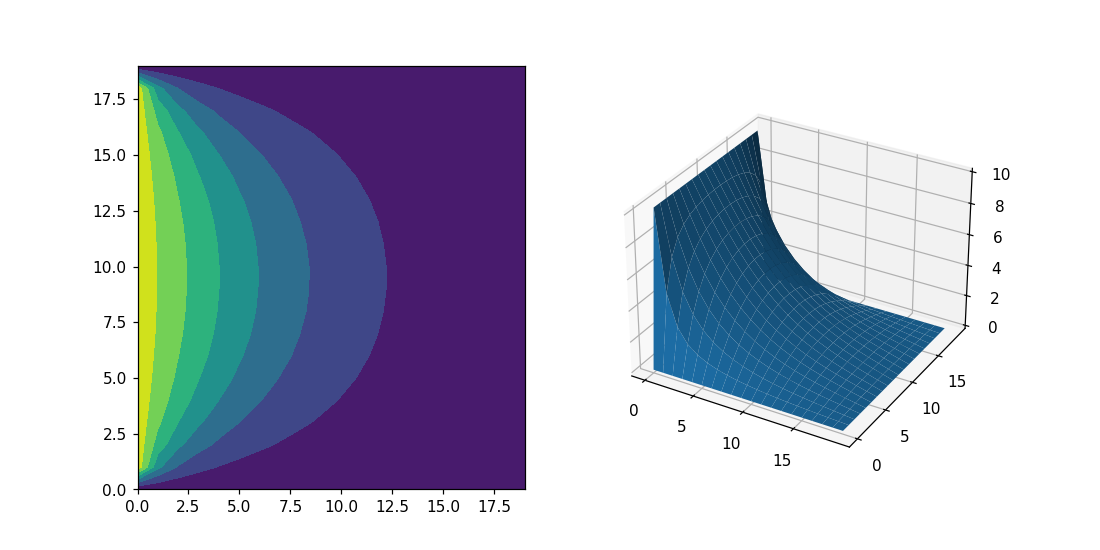

In [66]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection='3d')

X,Y = np.meshgrid(x,y)

c = ax.contourf(X,Y,Ef1.T)

ax1.plot_surface(X,Y,Ef1.T)